In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanium = pd.read_csv("Test.csv")

In [3]:
titanium.head(5)

,SKU,CONDITION,SIZE,GENDER,SOLD_AT,SOLD_PRICE,SOURCE,SIZE_VALUE,BRAND,NAME,COLORWAY,COLOR,SILHOUETTE,RETAILPRICE,RELEASEDATE,IS_COLLAB,COLLABORATOR
0,DC7294-200,is_new,12,men,2022-02-04T19:06:55Z,175.0,stockx,12.0,Jordan,Jordan 1 Mid SE Dark Chocolate,Dark Chocolate/Archaeo Brown/Black/Crimson Bliss,brown,Air Jordan 1,130,2021-11-26,False,None
1,315122-111/CW2288-111,is_new,10.5,men,2022-03-19T18:40:37Z,156.0,stockx,10.5,Nike,Nike Air Force 1 Low '07 White,White/White,white,Nike Air Force 1 Low '07,110,2007-11-24,False,None
2,DB2908,is_new,9.5,men,2021-11-05T04:04:24Z,499.0,stockx,9.5,adidas,adidas Yeezy 500 Blush,Blush/Blush/Blush,cream,Yeezy 500,200,2018-02-16,True,kanye west
3,CT8527-700,is_new,13,men,2022-01-29T16:11:22Z,299.0,stockx,13.0,Jordan,Jordan 4 Retro Lightning (2021),Tour Yellow/White-Dark Blue Grey,white,Air Jordan 4,220,2021-08-28,False,None
4,BB550WA1,is_new,7,men,2021-10-25T11:11:48Z,231.0,stockx,7.0,New Balance,New Balance 550 Navy Blue,Grey/Navy/White,grey,550,120,2021-06-24,False,None


/var/folders/11/cczssvr55zd5sy1zn_kr_zj40000gn/T/ipykernel_49773/2959484292.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  titanium['month_year'] = titanium['SOLD_AT'].dt.to_period('M')


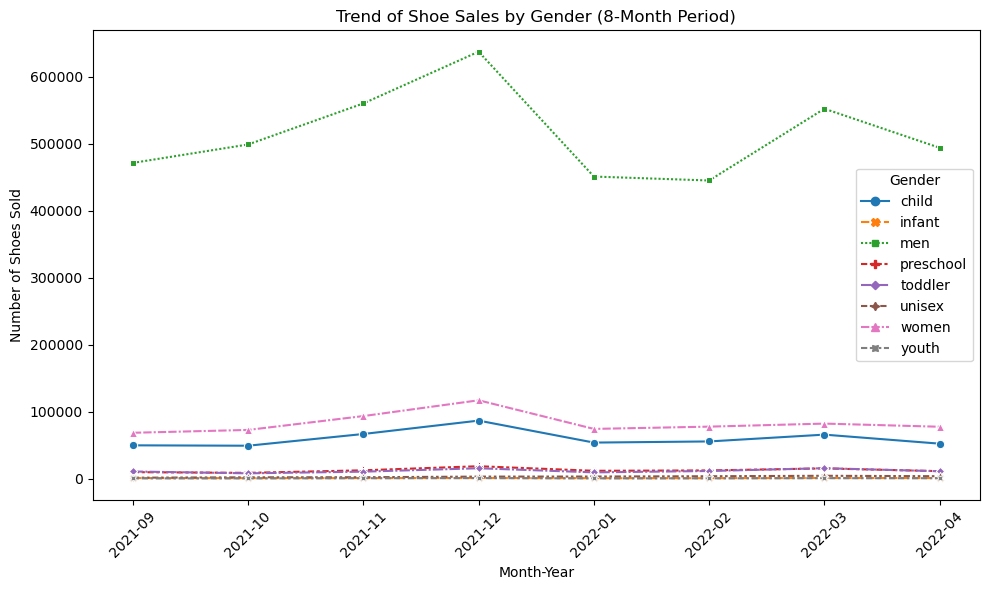

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'date' column to datetime format
titanium['SOLD_AT'] = pd.to_datetime(titanium['SOLD_AT'], errors='coerce')

# Drop rows with missing or incorrect date values
titanium = titanium.dropna(subset=['SOLD_AT'])

# Extract month and year from the datetime column
titanium['month_year'] = titanium['SOLD_AT'].dt.to_period('M')

# Group the data by gender and month_year, and count the number of sales
sales_by_gender = titanium.groupby(['GENDER', 'month_year']).size().reset_index(name='count')

# Pivot the table to have gender as columns and months as rows
sales_by_gender_pivot = sales_by_gender.pivot(index='month_year', columns='GENDER', values='count')

# Convert month_year to string format
sales_by_gender_pivot.index = sales_by_gender_pivot.index.astype(str)

# Plot the trend of shoe sales by gender over 8 months
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_gender_pivot, markers=True)
plt.title('Trend of Shoe Sales by Gender (8-Month Period)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Shoes Sold')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

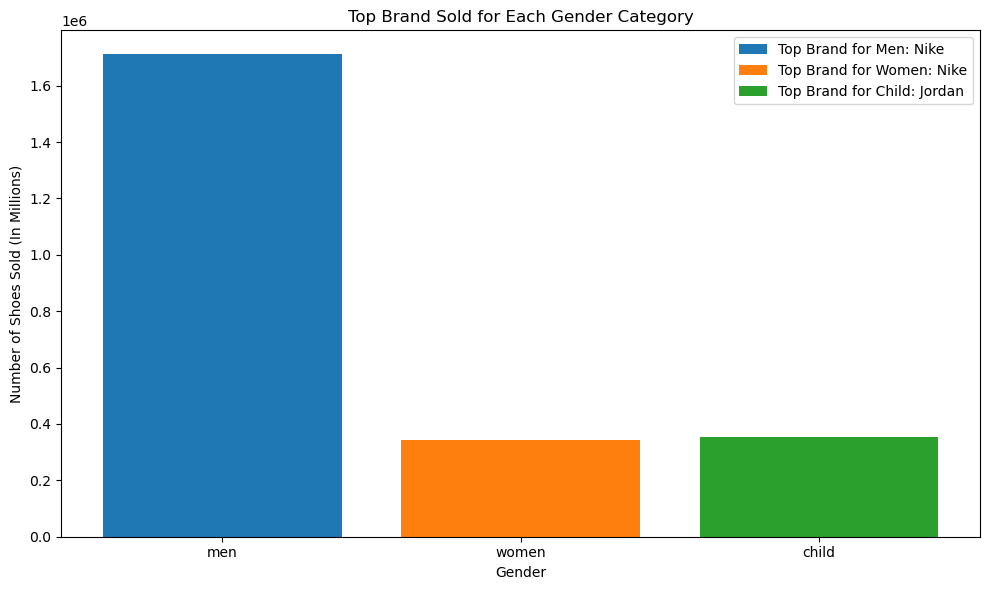

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called df

# Filter the dataset for only the specified gender categories (Men, Women, Child)
gender_categories = ['men', 'women', 'child']
df_filtered = titanium[titanium['GENDER'].isin(gender_categories)]

# Group the filtered data by gender and brand, and count the number of shoes sold for each brand
sales_by_gender_and_brand = df_filtered.groupby(['GENDER', 'BRAND']).size().reset_index(name='count')

# Initialize a dictionary to store top brands for each gender category
top_brands_by_gender = {}

# Iterate over each gender category
for gender in gender_categories:
    # Find the brand with the highest number of shoe sales for the current gender category
    top_brand = sales_by_gender_and_brand[sales_by_gender_and_brand['GENDER'] == gender].\
                nlargest(1, 'count')['BRAND'].values[0]
    # Store the top brand for the current gender category in the dictionary
    top_brands_by_gender[gender] = top_brand

# Create a bar plot for the top brands sold for each gender
plt.figure(figsize=(10, 6))
for gender, top_brand in top_brands_by_gender.items():
    plt.bar(gender, sales_by_gender_and_brand.loc[(sales_by_gender_and_brand['GENDER'] == gender) & 
                                                  (sales_by_gender_and_brand['BRAND'] == top_brand),
                                                  'count'].values[0],
            label=f'Top Brand for {gender.capitalize()}: {top_brand}')

plt.title('Top Brand Sold for Each Gender Category')
plt.xlabel('Gender')
plt.ylabel('Number of Shoes Sold (In Millions)')
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
titanium.head(5)

,SKU,CONDITION,SIZE,GENDER,SOLD_AT,SOLD_PRICE,SOURCE,SIZE_VALUE,BRAND,NAME,COLORWAY,COLOR,SILHOUETTE,RETAILPRICE,RELEASEDATE,IS_COLLAB,COLLABORATOR,month_year
0,DC7294-200,is_new,12,men,2022-02-04 19:06:55+00:00,175.0,stockx,12.0,Jordan,Jordan 1 Mid SE Dark Chocolate,Dark Chocolate/Archaeo Brown/Black/Crimson Bliss,brown,Air Jordan 1,130,2021-11-26,False,None,2022-02
1,315122-111/CW2288-111,is_new,10.5,men,2022-03-19 18:40:37+00:00,156.0,stockx,10.5,Nike,Nike Air Force 1 Low '07 White,White/White,white,Nike Air Force 1 Low '07,110,2007-11-24,False,None,2022-03
2,DB2908,is_new,9.5,men,2021-11-05 04:04:24+00:00,499.0,stockx,9.5,adidas,adidas Yeezy 500 Blush,Blush/Blush/Blush,cream,Yeezy 500,200,2018-02-16,True,kanye west,2021-11
3,CT8527-700,is_new,13,men,2022-01-29 16:11:22+00:00,299.0,stockx,13.0,Jordan,Jordan 4 Retro Lightning (2021),Tour Yellow/White-Dark Blue Grey,white,Air Jordan 4,220,2021-08-28,False,None,2022-01
4,BB550WA1,is_new,7,men,2021-10-25 11:11:48+00:00,231.0,stockx,7.0,New Balance,New Balance 550 Navy Blue,Grey/Navy/White,grey,550,120,2021-06-24,False,None,2021-10


Filtered DataFrame:
                     SKU CONDITION  SIZE GENDER                   SOLD_AT  \
0             DC7294-200    is_new    12    men 2022-02-04 19:06:55+00:00   
1  315122-111/CW2288-111    is_new  10.5    men 2022-03-19 18:40:37+00:00   
2                 DB2908    is_new   9.5    men 2021-11-05 04:04:24+00:00   
3             CT8527-700    is_new    13    men 2022-01-29 16:11:22+00:00   
4               BB550WA1    is_new     7    men 2021-10-25 11:11:48+00:00   

   SOLD_PRICE  SOURCE  SIZE_VALUE        BRAND  \
0       175.0  stockx        12.0       Jordan   
1       156.0  stockx        10.5         Nike   
2       499.0  stockx         9.5       adidas   
3       299.0  stockx        13.0       Jordan   
4       231.0  stockx         7.0  New Balance   

                              NAME  \
0   Jordan 1 Mid SE Dark Chocolate   
1   Nike Air Force 1 Low '07 White   
2           adidas Yeezy 500 Blush   
3  Jordan 4 Retro Lightning (2021)   
4        New Balance 550 N

/var/folders/11/cczssvr55zd5sy1zn_kr_zj40000gn/T/ipykernel_49773/3569477333.py:35: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  avg_sold_price_top_brand = df_top_brand.groupby(df_top_brand['SOLD_AT'].dt.to_period('M'))['SOLD_PRICE'].mean()
/var/folders/11/cczssvr55zd5sy1zn_kr_zj40000gn/T/ipykernel_49773/3569477333.py:35: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  avg_sold_price_top_brand = df_top_brand.groupby(df_top_brand['SOLD_AT'].dt.to_period('M'))['SOLD_PRICE'].mean()
/var/folders/11/cczssvr55zd5sy1zn_kr_zj40000gn/T/ipykernel_49773/3569477333.py:35: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  avg_sold_price_top_brand = df_top_brand.groupby(df_top_brand['SOLD_AT'].dt.to_period('M'))['SOLD_PRICE'].mean()


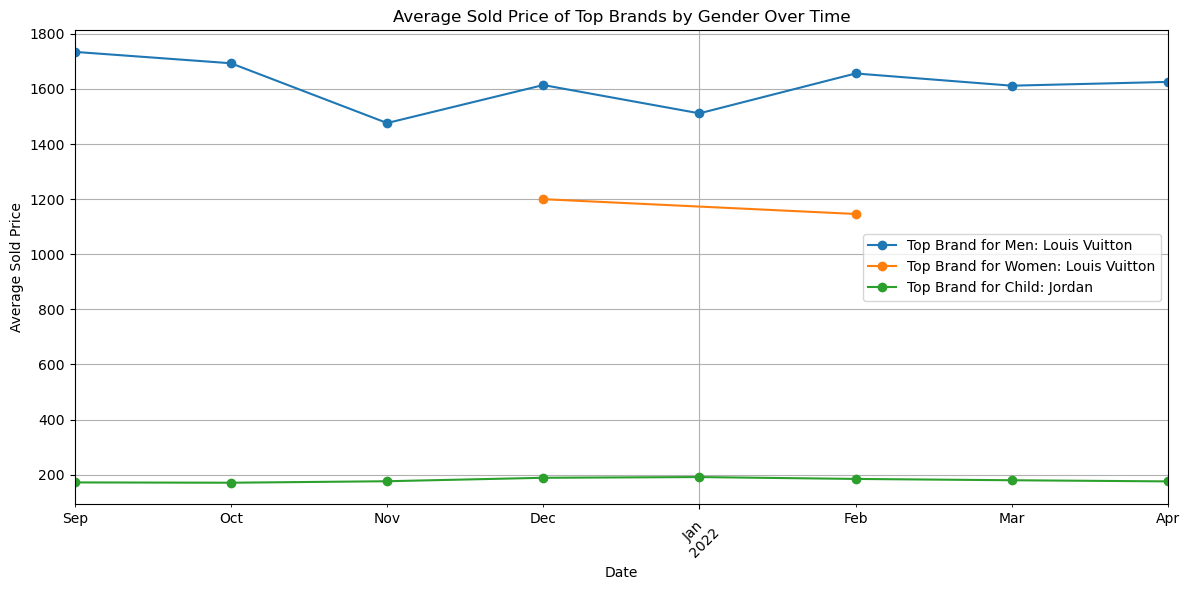

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called df

# Filter the dataset for only the specified gender categories (Men, Women, Child)
gender_categories = ['men', 'women', 'child']
df_filtered = titanium[titanium['GENDER'].isin(gender_categories)]

# Group the filtered data by gender and brand, and calculate the total number of shoes sold for each brand
sales_by_gender_and_brand = df_filtered.groupby(['GENDER', 'BRAND'])['SOLD_PRICE'].mean().reset_index()

# Print out the filtered dataframe to check if it's correctly filtered
print("Filtered DataFrame:")
print(df_filtered.head())

# Print out the unique brands in the filtered dataframe
print("Unique Brands:")
print(df_filtered['BRAND'].unique())

# Get the top-selling brand for each gender category
top_brands_by_gender = {}
for gender in gender_categories:
    top_brand = sales_by_gender_and_brand[sales_by_gender_and_brand['GENDER'] == gender].nlargest(1, 'SOLD_PRICE')['BRAND'].values[0]
    top_brands_by_gender[gender] = top_brand

# Print out the top brands identified for each gender category
print("Top Brands by Gender:")
print(top_brands_by_gender)

# Create a line plot for the average sold price of the top brand in each gender category over time
plt.figure(figsize=(12, 6))
for gender, top_brand in top_brands_by_gender.items():
    df_top_brand = df_filtered[(df_filtered['GENDER'] == gender) & (df_filtered['BRAND'] == top_brand)]
    avg_sold_price_top_brand = df_top_brand.groupby(df_top_brand['SOLD_AT'].dt.to_period('M'))['SOLD_PRICE'].mean()
    avg_sold_price_top_brand.plot(marker='o', linestyle='-', label=f'Top Brand for {gender.capitalize()}: {top_brand}')

plt.title('Average Sold Price of Top Brands by Gender Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sold Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


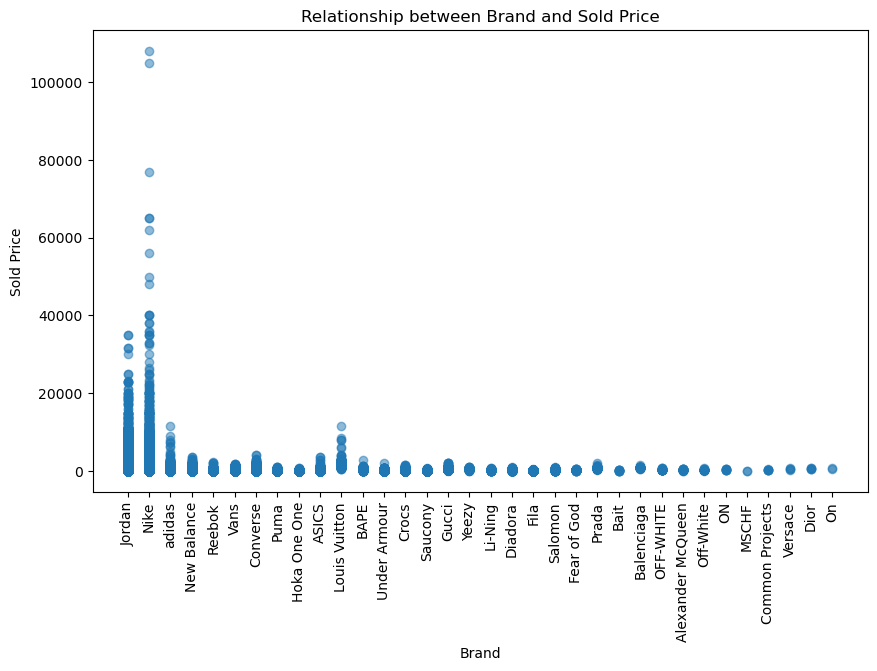

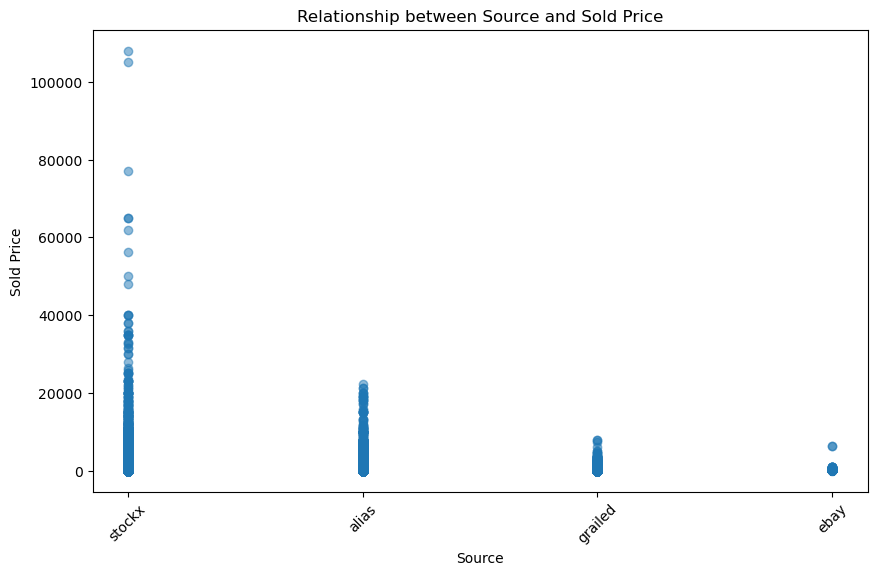

In [10]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Relationship between brand and sold price
plt.figure(figsize=(10, 6))
plt.scatter(titanium['BRAND'], titanium['SOLD_PRICE'], alpha=0.5)
plt.title('Relationship between Brand and Sold Price')
plt.xlabel('Brand')
plt.ylabel('Sold Price')
plt.xticks(rotation=90)  # Rotate x-axis label by 90 degrees
plt.show()


# Relationship between source and sold price
plt.figure(figsize=(10, 6))
plt.scatter(titanium['SOURCE'], titanium['SOLD_PRICE'], alpha=0.5)
plt.title('Relationship between Source and Sold Price')
plt.xlabel('Source')
plt.ylabel('Sold Price')
plt.xticks(rotation=45)
plt.show()


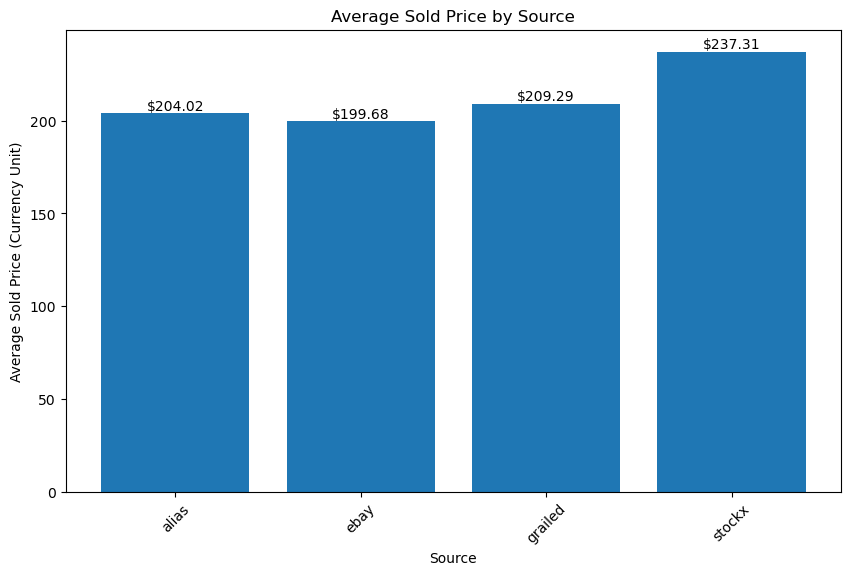

In [13]:
import matplotlib.pyplot as plt

# Calculate the average sold price for each source
avg_sold_price_by_source = titanium.groupby('SOURCE')['SOLD_PRICE'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_sold_price_by_source['SOURCE'], avg_sold_price_by_source['SOLD_PRICE'])
plt.title('Average Sold Price by Source')
plt.xlabel('Source')
plt.ylabel('Average Sold Price (Currency Unit)')  # Update the ylabel to include the currency unit
plt.xticks(rotation=45)  # Rotate x-axis label for better readability

# Add labels to the bars with currency unit
currency_unit = '$'  # Change this to the appropriate currency unit
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{currency_unit}{height:.2f}', ha='center', va='bottom')

plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()
 
# Fit and transform the education column and drop the old columns with non numeric values
titanium['condition'] = le.fit_transform(titanium['CONDITION'])
titanium['gender'] = le.fit_transform(titanium['GENDER'])
titanium['source'] = le.fit_transform(titanium['SOURCE'])
titanium['brand'] = le.fit_transform(titanium['BRAND'])
titanium['color'] = le.fit_transform(titanium['COLOR'])
titanium['silhouette'] = le.fit_transform(titanium['SILHOUETTE'])
titanium['is_collab'] = le.fit_transform(titanium['IS_COLLAB'])
titanium['collaborator'] = le.fit_transform(titanium['COLLABORATOR'])

# titanium = titanium.drop(['CONDITION'], axis=1)
# titanium = titanium.drop(['GENDER'], axis=1)
# titanium = titanium.drop(['SOURCE'], axis=1)
# titanium = titanium.drop(['BRAND'], axis=1)
# titanium = titanium.drop(['COLOR'], axis=1)
# titanium = titanium.drop(['SILHOUETTE'], axis=1)
# titanium = titanium.drop(['IS_COLLAB'], axis=1)
# titanium = titanium.drop(['COLLABORATOR'], axis=1)

In [15]:
titanium.head(10)

,SKU,CONDITION,SIZE,GENDER,SOLD_AT,SOLD_PRICE,SOURCE,SIZE_VALUE,BRAND,NAME,...,COLLABORATOR,month_year,condition,gender,source,brand,color,silhouette,is_collab,collaborator
0,DC7294-200,is_new,12,men,2022-02-04 19:06:55+00:00,175.0,stockx,12.0,Jordan,Jordan 1 Mid SE Dark Chocolate,...,None,2022-02,4,2,3,14,2,293,0,0
1,315122-111/CW2288-111,is_new,10.5,men,2022-03-19 18:40:37+00:00,156.0,stockx,10.5,Nike,Nike Air Force 1 Low '07 White,...,None,2022-03,4,2,3,19,13,2244,0,0
2,DB2908,is_new,9.5,men,2021-11-05 04:04:24+00:00,499.0,stockx,9.5,adidas,adidas Yeezy 500 Blush,...,kanye west,2021-11,4,2,3,33,3,3505,1,29
3,CT8527-700,is_new,13,men,2022-01-29 16:11:22+00:00,299.0,stockx,13.0,Jordan,Jordan 4 Retro Lightning (2021),...,None,2022-01,4,2,3,14,13,330,0,0
4,BB550WA1,is_new,7,men,2021-10-25 11:11:48+00:00,231.0,stockx,7.0,New Balance,New Balance 550 Navy Blue,...,None,2021-10,4,2,3,18,5,47,0,0
5,CP9654,is_new,8.5,men,2022-04-13 22:22:13+00:00,274.0,stockx,8.5,adidas,adidas Yeezy Boost 350 V2 Zebra,...,kanye west,2022-04,4,2,3,33,13,3510,1,29
6,GZ0472,is_new,6.5,men,2021-10-29 23:41:15+00:00,244.0,stockx,6.5,adidas,adidas Yeezy Boost 380 Stone Salt,...,kanye west,2021-10,4,2,3,33,0,3511,1,29
7,CZ0099-100/CW3144-100,is_new,4.5,men,2021-09-07 23:08:33+00:00,135.0,stockx,4.5,Nike,Nike PG 5 Playstation White,...,None,2021-09,4,2,3,19,1,2450,0,0
8,CT8527-700,is_new,9,men,2022-01-08 18:53:19+00:00,247.0,stockx,9.0,Jordan,Jordan 4 Retro Lightning (2021),...,None,2022-01,4,2,3,14,13,330,0,0
9,DJ7998-100,is_new,10,men,2022-01-16 15:02:34+00:00,183.0,stockx,10.0,Nike,Nike Air Force 1 Low Hare Space Jam,...,None,2022-01,4,2,3,19,13,267,0,0


In [16]:
titanium['COLORWAY'].unique()

array(['Dark Chocolate/Archaeo Brown/Black/Crimson Bliss', 'White/White',
       'Blush/Blush/Blush', ..., 'Coffee/Brown',
       'Racer Blue/Aluminum/Black', 'Binary Blue/Blue Moon'], dtype=object)

In [17]:
n = titanium.nunique(axis=0)
 
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 SKU               43648
CONDITION             8
SIZE                355
GENDER                8
SOLD_AT         4435932
SOLD_PRICE         4519
SOURCE                4
SIZE_VALUE           39
BRAND                34
NAME              43560
COLORWAY          28503
COLOR                15
SILHOUETTE         3825
RETAILPRICE         314
RELEASEDATE        4036
IS_COLLAB             2
COLLABORATOR         70
month_year            8
condition             8
gender                8
source                4
brand                34
color                15
silhouette         3825
is_collab             2
collaborator         70
dtype: int64


/var/folders/11/cczssvr55zd5sy1zn_kr_zj40000gn/T/ipykernel_49773/1390644445.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanium.corr()


Text(0.5, 1.0, 'Correlation Plot')

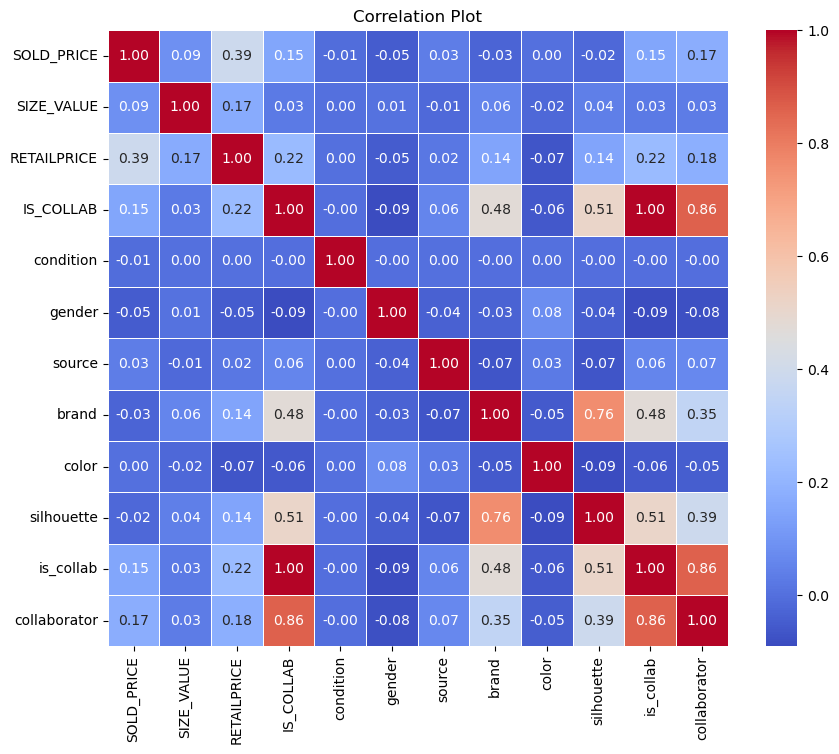

In [18]:
# Creating a correlation matrix
correlation_matrix = titanium.corr()
 
# Create a correlation plot using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your dataset containing the relevant columns including 'COLLABORATOR'

# Drop rows with missing values in 'COLLABORATOR' and other relevant columns
titanium.dropna(subset=['collaborator', 'is_collab', 'gender', 'brand','condition','source','color','silhouette','SOLD_PRICE'], inplace=True)

# Encode categorical variables if any
label_encoder = LabelEncoder()
titanium['is_collab'] = label_encoder.fit_transform(titanium['is_collab'])
titanium['gender'] = label_encoder.fit_transform(titanium['gender'])
titanium['brand'] = label_encoder.fit_transform(titanium['brand'])

# Select relevant features and target variable
X = titanium[['is_collab', 'gender', 'brand','condition','source','color','silhouette']]  # Features
y = titanium['SOLD_PRICE']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a machine learning algorithm (e.g., Linear Regression)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance (e.g., using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2:.2f}')

from sklearn.linear_model import Lasso, Ridge

# Train Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the regularization parameter alpha
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
print(f'Lasso Mean Squared Error: {lasso_mse:.2f}')

# Train Ridge regression model
ridge_model = Ridge(alpha=0.1)  # You can adjust the regularization parameter alpha
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print(f'Ridge Mean Squared Error: {ridge_mse:.2f}')


Mean Squared Error: 86506.41
R-squared Score: 0.04
Lasso Mean Squared Error: 86506.71
Ridge Mean Squared Error: 86506.41


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Select features and target variable
X = titanium[['is_collab', 'gender', 'brand','condition','source','color','silhouette']]
y = titanium['SOLD_PRICE'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Modeling
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),  # You can adjust the regularization parameter alpha
    'Ridge Regression': Ridge(alpha=0.1),  # You can adjust the regularization parameter alpha
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R-squared': r2}

# Print model evaluation results
print("Model Evaluation:")
for name, result in results.items():
    print(f"{name}:")
    print(f"  MSE: {result['MSE']:.2f}")
    print(f"  R-squared: {result['R-squared']:.2f}")

# Analyze Results: Feature Importance (for Random Forest Regression)
rf_model = models['Random Forest Regression']
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)



Model Evaluation:
Linear Regression:
  MSE: 86506.41
  R-squared: 0.04
Lasso Regression:
  MSE: 86506.71
  R-squared: 0.04
Ridge Regression:
  MSE: 86506.41
  R-squared: 0.04
Random Forest Regression:
  MSE: 54898.80
  R-squared: 0.39

Feature Importance:
silhouette    0.410491
color         0.325344
brand         0.122721
gender        0.058340
is_collab     0.057688
source        0.020793
condition     0.004624
dtype: float64


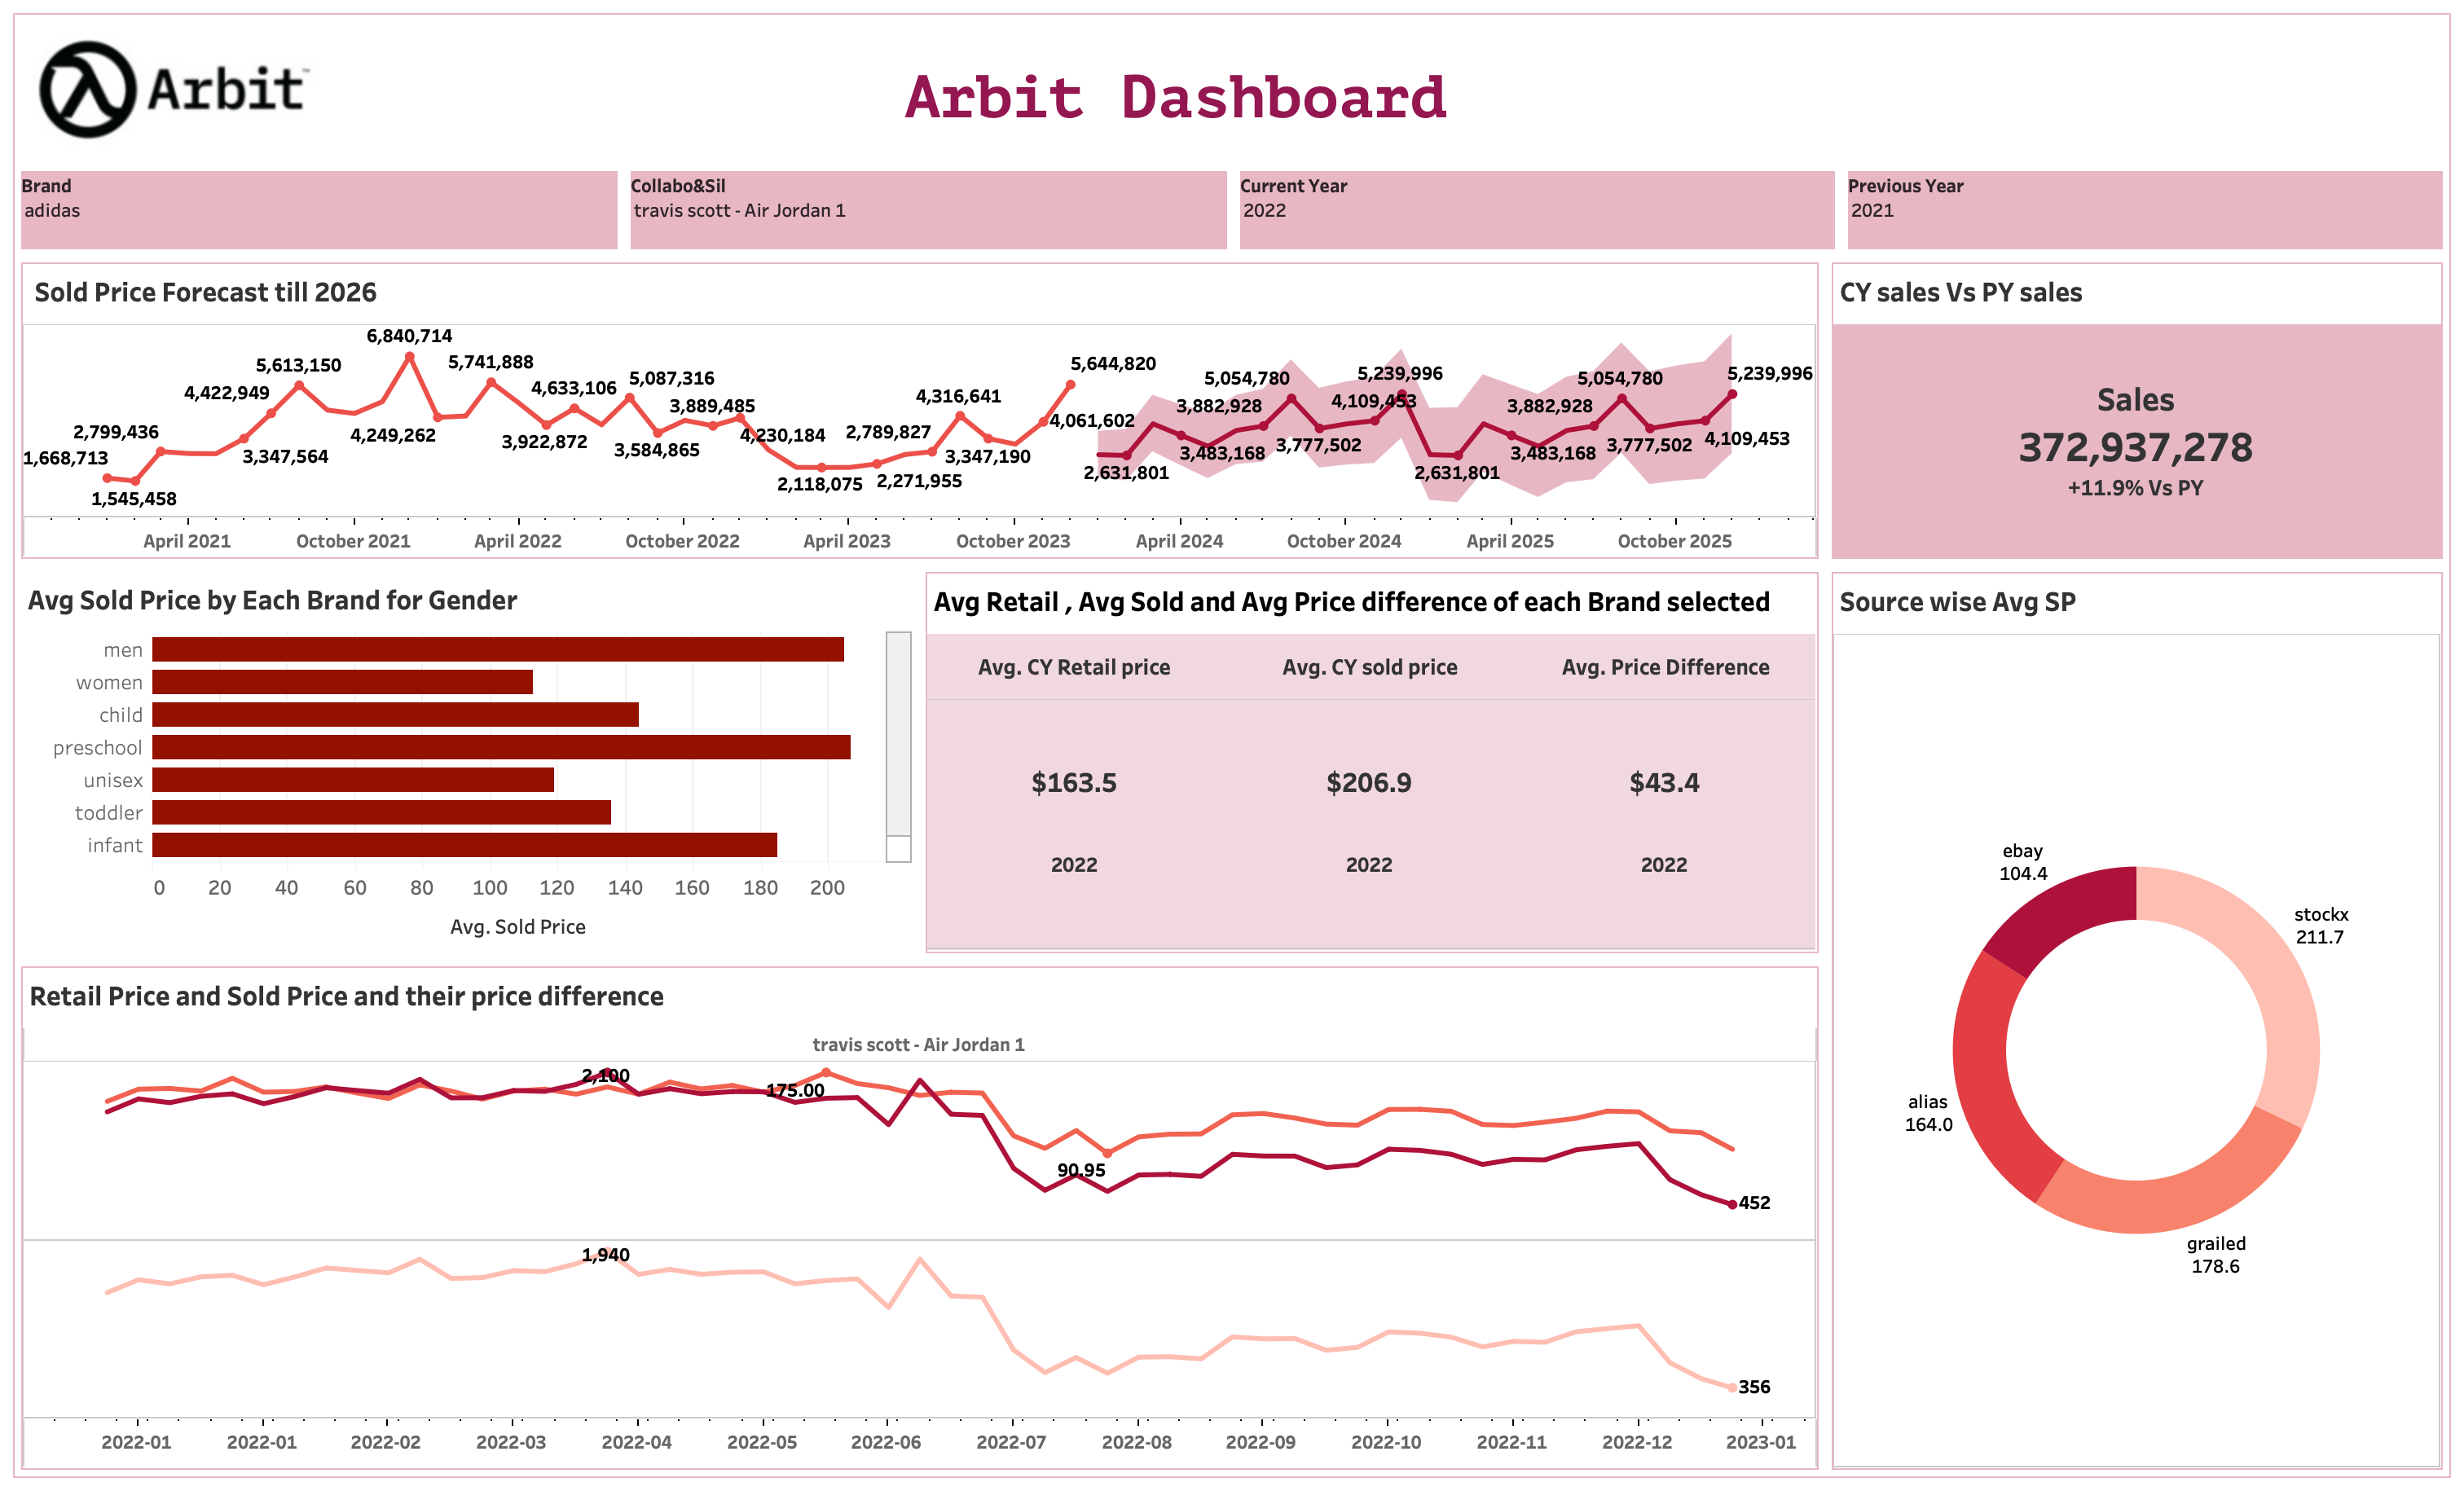

In [1]:
## Dashboard Screenshot: 

from IPython.display import Image

Image(filename='ArbitDashboard.png')

The Tableau interactive dashboard provides a comprehensive view of various aspects within the footwear market, facilitating strategic decision-making and market analysis. The "Sold Price Forecast till 2026" sheet offers insights into projected sales trends, aiding in long-term planning and forecasting. Meanwhile, the "Retail Price" and "Sold Price" sheets offer detailed information on pricing dynamics, allowing stakeholders to understand how retail and sold prices evolve over time and assess their impact on profitability. The "Price Difference" sheet further enhances this analysis by highlighting the variance between retail and sold prices, aiding in identifying pricing strategies and potential areas for improvement.

The "Retailer-Wise Total Sales" sheet provides a breakdown of sales figures by retailer, enabling stakeholders to evaluate each retailer's performance and identify strategic partnerships. Additionally, the "Collaborators and Their Silhouette" sheet sheds light on collaborative efforts within the market, showcasing which brands collaborate with others and the resulting product offerings. This insight is invaluable for understanding brand positioning and market trends.

The "CY Sales vs. PY Sales" sheet facilitates year-on-year performance comparisons, allowing stakeholders to gauge sales growth and identify emerging trends. This analysis helps in understanding market dynamics and adapting strategies accordingly.

Finally, the "Retail, Sold, and Sum Sold Price of Each Brand" sheet offers a comprehensive overview of brand performance, displaying key metrics such as average retail prices, average sold prices, and total sum of sold prices. This enables stakeholders to compare brand performance and identify opportunities for growth or improvement.

Overall, the Tableau dashboard provides a wealth of information crucial for market analysis and strategic decision-making in the footwear industry. By synthesizing data from various sources into clear and actionable insights, the dashboard empowers stakeholders to stay ahead of market trends and make informed decisions that drive business success.